In [1]:
import coeficients
import cmeans_math.data_loads as data_loads
import cmeans_math.data_preprocessing as dp

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./data/wine/wine.data', names=['class', 'param_0', 'param_1', 'param_2', 'param_3', 'param_4', 'param_5',
                                                   'param_6', 'param_7', 'param_8', 'param_9', 'param_10', 'param_11'])
data.head()

,class,param_0,param_1,param_2,param_3,param_4,param_5,param_6,param_7,param_8,param_9,param_10,param_11
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = np.array(data[['param_0', 'param_1', 'param_2', 'param_3', 'param_4', 'param_5',
                   'param_6', 'param_7', 'param_8', 'param_9', 'param_10', 'param_11']])

In [4]:
X = np.array(dp.get_updated_data_set(X))
X

array([[-0.61660079,  0.14438503, -0.48453608, ..., -0.08943089,
         0.94139194,  0.12268188],
       [-0.58893281, -0.1657754 , -0.93814433, ..., -0.07317073,
         0.56043956,  0.10128388],
       [-0.35968379,  0.40106952, -0.17525773, ..., -0.10569106,
         0.39194139,  0.29386591],
       ...,
       [ 0.39920949, -0.03743316, -0.03092784, ..., -0.82113821,
        -0.78754579, -0.20542083],
       [-0.2687747 ,  0.0802139 , -0.03092784, ..., -0.80487805,
        -0.74358974, -0.19828816],
       [ 0.32806324,  0.47593583,  0.43298969, ..., -0.78861789,
        -0.75824176, -0.59771755]])

In [5]:
fsi = []
pc = []
pec = []
pcaes = []
mah = []
mah_inv = []
klc = []

In [6]:
min_cluster_count = 1
max_cluster_count = 20

In [7]:
for i in range(min_cluster_count, max_cluster_count + 1):
    cmeans_tst = coeficients.FCM_coef(mat_X=X, n_clusters=i, max_iter=300, random_state=1)
    cmeans_tst.fit()
    fsi.append(cmeans_tst.fukuyama_sugeno_index)
    pc.append(cmeans_tst.partition_coefficient)
    pec.append(cmeans_tst.partition_entropy_coefficient)
    pcaes.append(cmeans_tst.partition_coef_exp_sep)
    mah.append(cmeans_tst.mahalanobis_coefficient)
    mah_inv.append(cmeans_tst.mahalanobis_inverse_coefficient)
    klc.append(cmeans_tst.kulback_leibler_coefficient)
    print('Tested clusters:', i)

Tested clusters: 1
Tested clusters: 2
Tested clusters: 3
Tested clusters: 4
Tested clusters: 5
Tested clusters: 6
Tested clusters: 7
Tested clusters: 8
Tested clusters: 9
Tested clusters: 10
Tested clusters: 11
Tested clusters: 12
Tested clusters: 13
Tested clusters: 14
Tested clusters: 15
Tested clusters: 16
Tested clusters: 17
Tested clusters: 18
Tested clusters: 19
Tested clusters: 20


In [8]:
res_coefs = pd.DataFrame()
res_coefs['fsi'] = np.array(fsi)
res_coefs['pc'] = np.array(pc)
res_coefs['pec'] = np.array(pec)
res_coefs['pcaes'] = np.array(pcaes)
res_coefs['mah'] = np.array(mah)
res_coefs['mah_inv'] = np.array(mah_inv)
res_coefs['klc'] = np.array(klc)

In [9]:
res_coefs

,fsi,pc,pec,pcaes,mah,mah_inv,klc
0,350.084045,1.000000,-0.000000,0.000000,3.309490,3.309490,0.000000
1,-33.541500,0.645935,0.770651,174.025009,3.344287,4.677880,-31.358257
2,-52.660088,0.494864,1.244875,273.115814,3.376896,5.781725,-29.766197
3,552.183716,0.369187,1.681704,333.653900,3.667621,8.470966,-20.533821
4,250.673187,0.296135,1.998229,778.080261,3.756287,10.493848,-16.786020
5,16.121124,0.248606,2.242664,591.979004,4.102961,13.548329,-14.953678
6,12.659777,0.212081,2.476854,596.482544,3.604840,14.244908,-12.275223
7,-18.097258,0.184817,2.672564,1049.756958,4.674667,20.317238,-10.663294
8,5.178610,0.165767,2.827674,914.403259,6.169454,29.456228,-9.966937
9,144.146378,0.148060,2.986037,1402.882690,5.982975,32.131767,-8.829228


In [10]:
res_coefs.to_csv('./data/results/wine_res.csv')

In [11]:
def plot_res(x, y, x_label, y_label, title):
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:
res_coefs = pd.read_csv('./data/results/wine_res.csv')

In [17]:
res_coefs.head()

,Unnamed: 0,fsi,pc,pec,pcaes,mah,mah_inv,klc
0,0,350.084050,1.000000,-0.000000,0.000000,3.309490,3.309490,0.000000
1,1,-33.541500,0.645935,0.770651,174.025009,3.344287,4.677880,-31.358257
2,2,-52.660088,0.494864,1.244875,273.115814,3.376896,5.781725,-29.766197
3,3,552.183700,0.369187,1.681704,333.653900,3.667621,8.470966,-20.533821
4,4,250.673190,0.296135,1.998229,778.080261,3.756287,10.493848,-16.786020


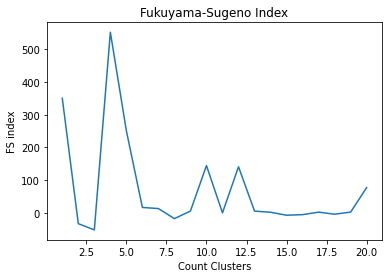

In [18]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['fsi'],
         x_label='Count Clusters', y_label='FS index', title='Fukuyama-Sugeno Index')

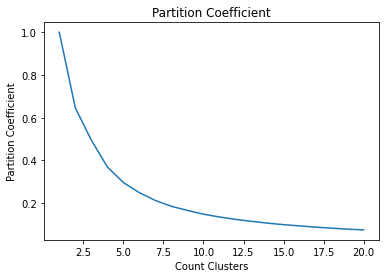

In [19]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['pc'],
         x_label='Count Clusters', y_label='Partition Coefficient', title='Partition Coefficient')

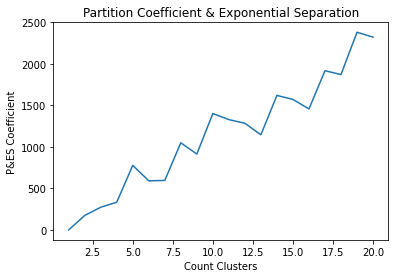

In [20]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['pcaes'],
         x_label='Count Clusters', y_label='P&ES Coefficient', title='Partition Coefficient & Exponential Separation')

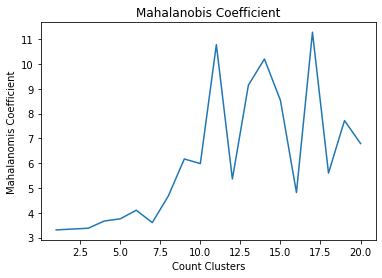

In [21]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['mah'],
         x_label='Count Clusters', y_label='Mahalanomis Coefficient', title='Mahalanobis Coefficient')

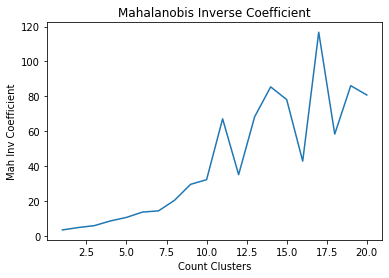

In [22]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['mah_inv'],
         x_label='Count Clusters', y_label='Mah Inv Coefficient', title='Mahalanobis Inverse Coefficient')

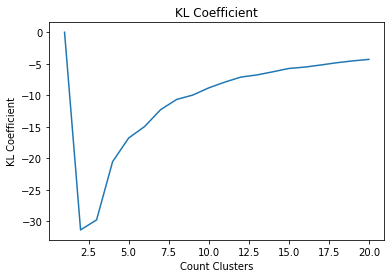

In [23]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['klc'],
         x_label='Count Clusters', y_label='KL Coefficient', title='KL Coefficient')